In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!git clone https://github.com/burakbasher/team12-accident-probability.git /content/drive/MyDrive/team12-accident-probability


Cloning into '/content/drive/MyDrive/team12-accident-probability'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 0), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 79.85 KiB | 13.31 MiB/s, done.


In [6]:
%cd /content/drive/MyDrive/team12-accident-probability

/content/drive/MyDrive/team12-accident-probability


In [7]:
!git checkout -b MelikeBeriaAyas


Switched to a new branch 'MelikeBeriaAyas'


# Accident Severity Prediction from Road Conditions


### Exploratory Data Analysis



##### Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 652M/653M [00:30<00:00, 23.5MB/s]
100% 653M/653M [00:30<00:00, 22.8MB/s]


In [ ]:
!unzip /content/us-accidents.zip -d /content/

Archive:  /content/us-accidents.zip
  inflating: /content/US_Accidents_March23.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/US_Accidents_March23.csv') # Load the dataset into df

df.head() # Display the first 5 rows and last 5 rows of the data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
print("Shape:", df.shape)  # Display the number of rows and columns in the dataset
print("\nColumn Names:", df.columns)  # List all column names
print("\nData Types:\n", df.dtypes)  # Show the data types of each column

Shape: (7728394, 46)

Column Names: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Data Types:
 ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng 


#### Summary Stats of Numeric Columns
Count: The total number of observations                                              
Mean: The average value                     
Standard Deviation (Std): A measure of the spread of the data                        
Min: The smallest value                                          
25th Percentile (Q1): The first quartile (25% of the data is below this value)                         
50th Percentile (Median or Q2): The median (50% of the data is below this value)                               
75th Percentile (Q3): The third quartile (75% of the data is below this value)                               
Max: The largest value                      

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01



#### Identifying Column Types

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Extract numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Extract categorical columns
bool_cols = df.select_dtypes(include=['bool']).columns  # Extract boolean columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", bool_cols)

Numerical Columns: Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')
Categorical Columns: Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')
Boolean Columns: Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


#### Checking Missing Values

In [ ]:
missing = df.isnull().sum()  # Count missing values in each column
missing_percentage = (missing / len(df)) * 100  # Calculate the percentage of missing values

print("Missing Values:\n", pd.DataFrame({'Count': missing, 'Percentage': missing_percentage}))


Missing Values:
                          Count  Percentage
ID                           0    0.000000
Source                       0    0.000000
Severity                     0    0.000000
Start_Time                   0    0.000000
End_Time                     0    0.000000
Start_Lat                    0    0.000000
Start_Lng                    0    0.000000
End_Lat                3402762   44.029355
End_Lng                3402762   44.029355
Distance(mi)                 0    0.000000
Description                  5    0.000065
Street                   10869    0.140637
City                       253    0.003274
County                       0    0.000000
State                        0    0.000000
Zipcode                   1915    0.024779
Country                      0    0.000000
Timezone                  7808    0.101030
Airport_Code             22635    0.292881
Weather_Timestamp       120228    1.555666
Temperature(F)          163853    2.120143
Wind_Chill(F)          1999019   25.8

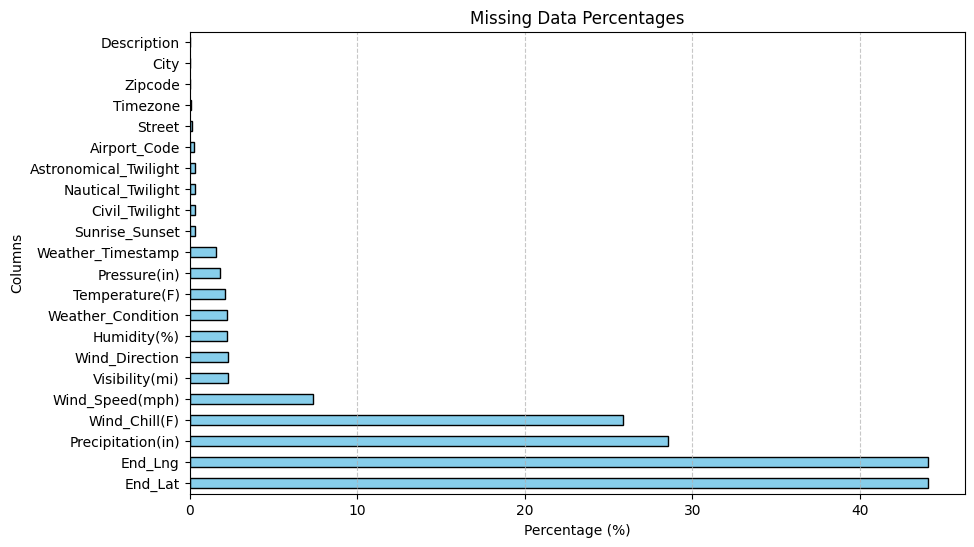

In [ ]:
# Horizontal Bar Plot for Missing Values
import matplotlib.pyplot as plt

# Filter and sort missing percentages that are not zero
missing_percentage[missing_percentage != 0].sort_values(ascending=False).plot(
    kind='barh',
    color='skyblue',
    figsize=(10, 6),
    edgecolor='black'
)

plt.title("Missing Data Percentages")
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Correlation Analysis

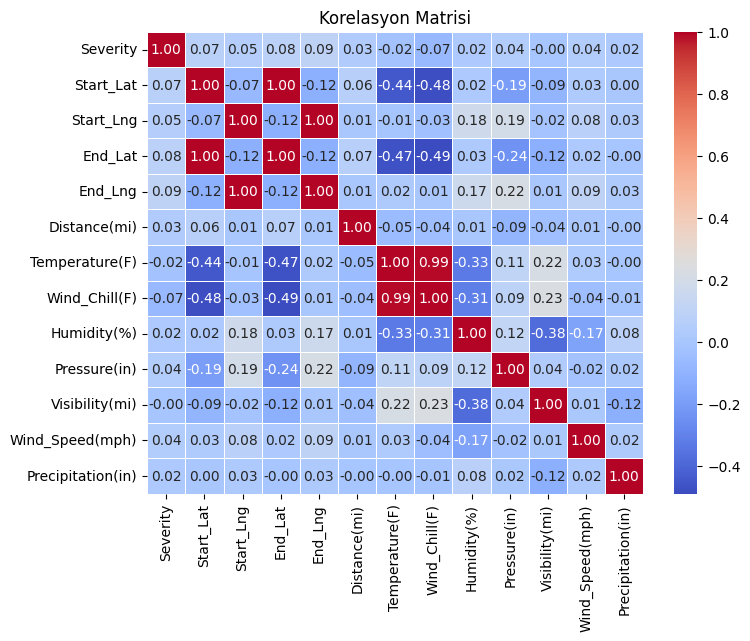

In [ ]:
# Correlation matrix visualization
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

## Data Preparation
Data Preparation is the process of transforming raw data into a suitable format for modeling.

#### Feature Selection

In [ ]:
# Detection of highly correlated characteristics
threshold = 0.9
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Selection by threshold value
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]
print(high_corr_pairs)

Start_Lng       End_Lng           0.999999
End_Lng         Start_Lng         0.999999
Start_Lat       End_Lat           0.999993
End_Lat         Start_Lat         0.999993
Temperature(F)  Wind_Chill(F)     0.993744
Wind_Chill(F)   Temperature(F)    0.993744
dtype: float64


In [ ]:
missing = df[['Start_Lng', 'End_Lng', 'Start_Lat', 'End_Lat', 'Temperature(F)', 'Wind_Chill(F)']].isnull().sum()  # Count missing values in each column
missing_percentage = (missing / len(df)) * 100  # Calculate the percentage of missing values

print("Missing Values:\n", pd.DataFrame({'Count': missing, 'Percentage': missing_percentage}))


Missing Values:
                   Count  Percentage
Start_Lng             0    0.000000
End_Lng         3402762   44.029355
Start_Lat             0    0.000000
End_Lat         3402762   44.029355
Temperature(F)   163853    2.120143
Wind_Chill(F)   1999019   25.865904


In [ ]:
df = df.drop(columns=['End_Lng','End_Lat','Wind_Chill(F)'])

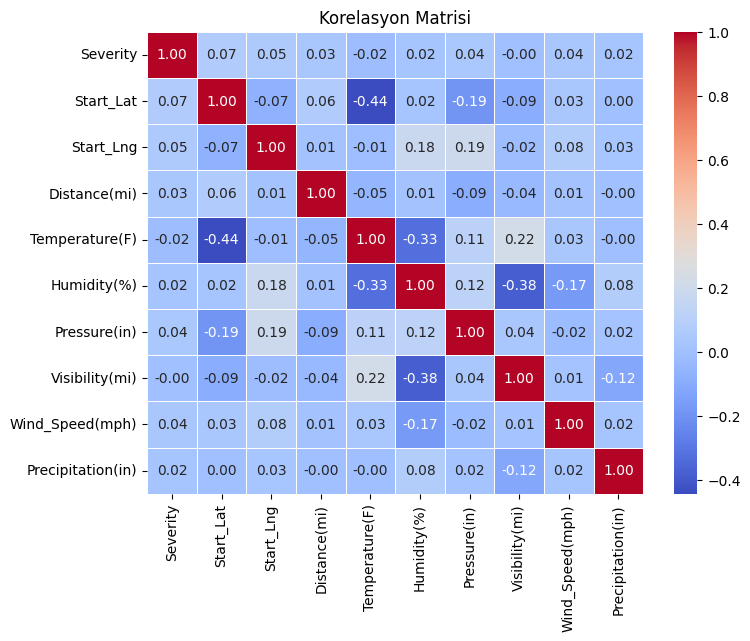

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_cols].corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

#### Data Cleaning


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Extract categorical columns
# Fill in the missing data in each categorical column with the mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill in the missing data in each numeric column with the mean
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [ ]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0



#### Data Transformation

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


#### Outlier Detection

In [ ]:
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_predictions = iso_forest.fit_predict(df)


outliers = df[outlier_predictions == -1]
df = df[outlier_predictions == 1]


In [ ]:
df.shape


(7341974, 43)

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,1111014,1,2,4,1,39.928059,-82.831184,0.01,281324,171739,...,False,False,False,False,False,False,1,1,1,0
2,2222108,1,2,6,2,39.063148,-84.032608,0.01,806104,306731,...,False,False,False,False,True,False,1,1,0,0
3,3313304,1,3,8,3,39.747753,-84.205582,0.01,615437,225953,...,False,False,False,False,False,False,1,0,0,0
4,4416579,1,2,9,4,39.627781,-84.188354,0.01,750627,246493,...,False,False,False,False,True,False,0,0,0,0
5,5514518,1,3,10,5,40.100590,-82.925194,0.01,551323,330966,...,False,False,False,False,False,False,0,0,0,0


#### Sampling

In [ ]:
import pandas as pd
from sklearn.utils import resample


# Target variable
target_column = 'Severity'

classes = df[target_column].unique()

sampled_data = pd.DataFrame()

# Perform downsampling by randomly selecting 25% of the data from the current class
for c in classes:
    class_data = df[df[target_column] == c]

    class_sample = resample(class_data,
                            replace=False,
                            n_samples=int(len(class_data) * 0.25),
                            random_state=42)

    sampled_data = pd.concat([sampled_data, class_sample])

df=sampled_data


In [ ]:

df.shape

(1835491, 43)

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6107640,5682283,0,2,4194215,4397460,38.009863,-122.020082,0.797,3350716,174935,...,False,False,False,False,False,False,0,0,0,0
5474934,4983629,0,2,4343884,4565924,37.823364,-122.264633,0.617,3546710,225816,...,False,False,False,False,False,False,1,1,1,1
5383042,4881944,0,2,4830994,5142766,47.376498,-115.349321,0.103,1820481,30417,...,False,False,False,False,False,False,1,1,1,1
7355211,7066904,0,2,2422296,2418286,39.403834,-74.527560,0.409,1280561,162282,...,False,False,False,False,False,False,0,0,0,0
7377973,7092195,0,2,2049701,2042937,44.426256,-121.877935,0.587,1237003,119627,...,False,False,False,False,False,False,0,0,0,0


In [ ]:
target_column = 'Severity'

classes = df[target_column].unique()
print(classes)

[2 3 1 4]


In [ ]:
df['Severity'].value_counts()

,count
Severity,
2,1473428
3,305380
4,41548
1,15135



#### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
# Create x and y data (X properties, y target variable)
X = df.drop(columns=['Severity'])
y = df['Severity']

#divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling

#### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9382
Precision: 0.9364
Recall: 0.9382
F1 Score: 0.9359

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.66      0.74      3115
           2       0.95      0.98      0.96    294773
           3       0.88      0.83      0.85     60907
           4       0.86      0.50      0.63      8304

    accuracy                           0.94    367099
   macro avg       0.88      0.74      0.80    367099
weighted avg       0.94      0.94      0.94    367099



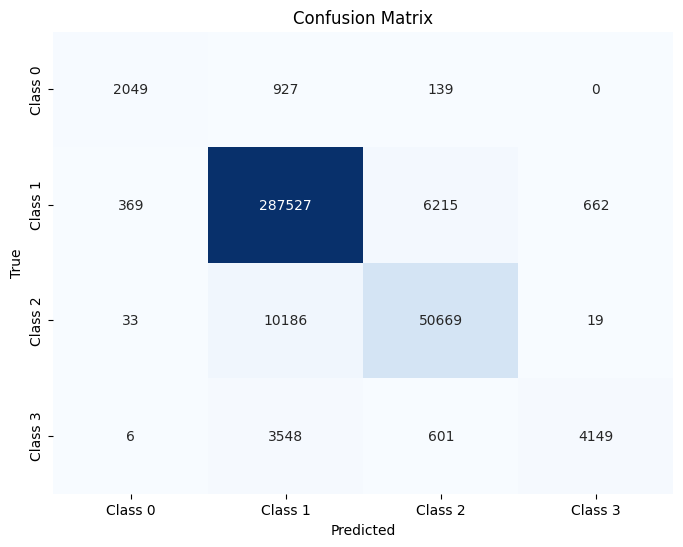

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



Accuracy: 0.8228
Precision: 0.7881
Recall: 0.8228
F1 Score: 0.7925

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3115
           2       0.85      0.95      0.90    294773
           3       0.60      0.34      0.44     60907
           4       0.41      0.00      0.00      8304

    accuracy                           0.82    367099
   macro avg       0.46      0.32      0.33    367099
weighted avg       0.79      0.82      0.79    367099



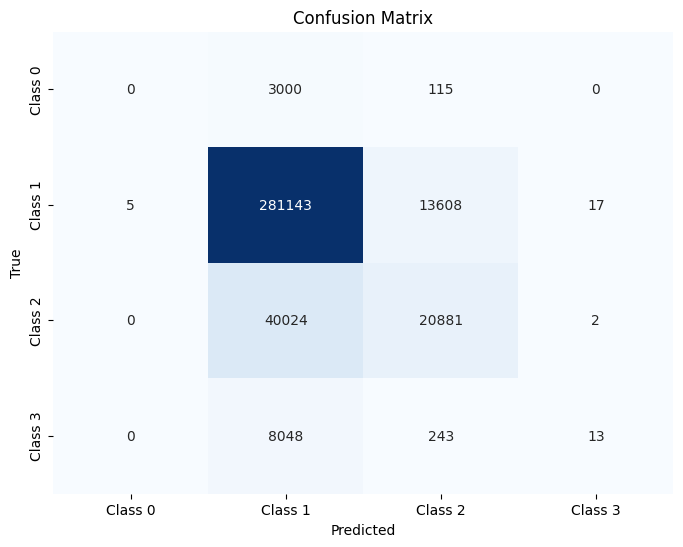

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### catboost Model

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9165
Precision: 0.9152
Recall: 0.9165
F1 Score: 0.9120

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.50      0.63      3115
           2       0.93      0.97      0.95    294773
           3       0.84      0.74      0.78     60907
           4       1.00      0.43      0.60      8304

    accuracy                           0.92    367099
   macro avg       0.90      0.66      0.74    367099
weighted avg       0.92      0.92      0.91    367099



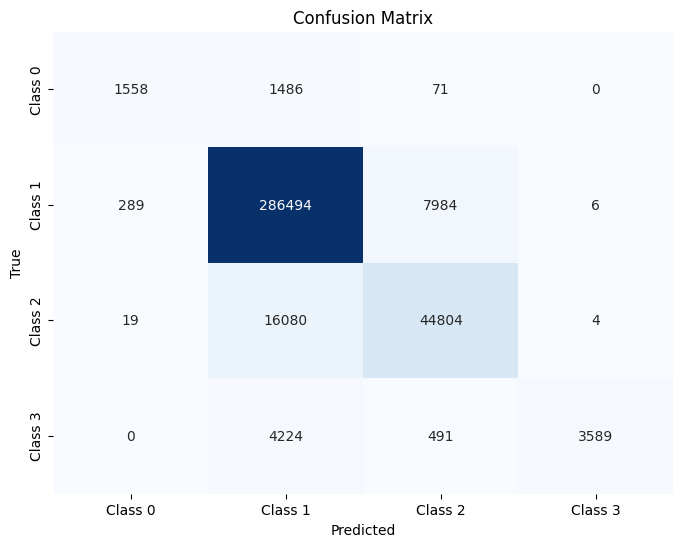

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### xgboost model

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

xgb_model.fit(X_train, y_train_encoded)

y_pred = xgb_model.predict(X_test)

Accuracy: 0.9059
Precision: 0.9032
Recall: 0.9059
F1 Score: 0.9011

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.54      0.01      3115
           2       0.18      0.03      0.05    294773
           3       0.01      0.00      0.00     60907
           4       0.00      0.00      0.00      8304

    accuracy                           0.03    367099
   macro avg       0.04      0.11      0.01    367099
weighted avg       0.15      0.03      0.04    367099



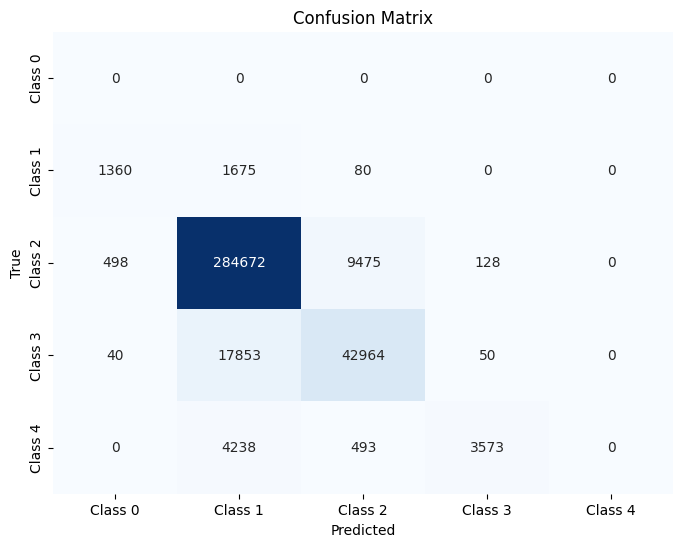

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
